<a href="https://colab.research.google.com/github/domywillygithub/Codes/blob/main/FOREX_FORECAST_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import Timestamp
from pandas.tseries.offsets import BDay
import itertools
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()
sns.set_palette('bright')

In [ ]:
df = pd.read_csv('/content/Download Data - CURRENCY_US_XTUP_EURUSD.csv', index_col='Date')
df=df[::-1]
df

,Open,High,Low,Close,Unnamed: 5,Unnamed: 6,0.9539,Unnamed: 8,1.1146
Date,,,,,,,,,
6/9/2022,1.0718,1.0774,1.0611,1.0619,NaN,NaN,NaN,NaN,NaN
6/10/2022,1.0617,1.0644,1.0509,1.0518,NaN,NaN,NaN,NaN,NaN
6/13/2022,1.0521,1.0522,1.0400,1.0407,NaN,NaN,NaN,NaN,NaN
6/14/2022,1.0408,1.0485,1.0398,1.0418,NaN,NaN,NaN,NaN,NaN
6/15/2022,1.0419,1.0509,1.0359,1.0446,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6/5/2023,1.0728,1.0728,1.0675,1.0715,NaN,NaN,NaN,NaN,NaN
6/6/2023,1.0713,1.0734,1.0668,1.0693,NaN,NaN,NaN,NaN,NaN
6/7/2023,1.0694,1.0741,1.0669,1.0701,NaN,NaN,NaN,NaN,NaN


In [ ]:
columns_to_delete = ['Unnamed: 5', 'Unnamed: 6', '0.9539', 'Unnamed: 8', '1.1146']
df = df.drop(columns=columns_to_delete)

df=pd.DataFrame(df)
df

,Open,High,Low,Close
Date,,,,
6/9/2022,1.0718,1.0774,1.0611,1.0619
6/10/2022,1.0617,1.0644,1.0509,1.0518
6/13/2022,1.0521,1.0522,1.0400,1.0407
6/14/2022,1.0408,1.0485,1.0398,1.0418
6/15/2022,1.0419,1.0509,1.0359,1.0446
...,...,...,...,...
6/5/2023,1.0728,1.0728,1.0675,1.0715
6/6/2023,1.0713,1.0734,1.0668,1.0693
6/7/2023,1.0694,1.0741,1.0669,1.0701


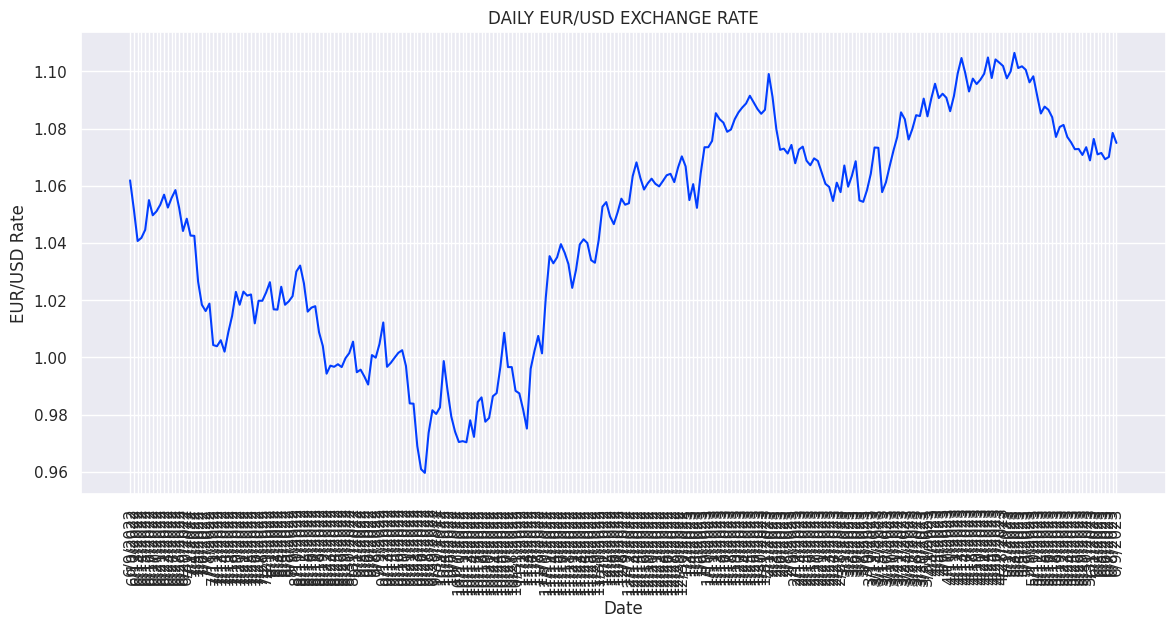

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(df['Close'])
plt.title('DAILY EUR/USD EXCHANGE RATE')
plt.ylabel('EUR/USD Rate')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.show()

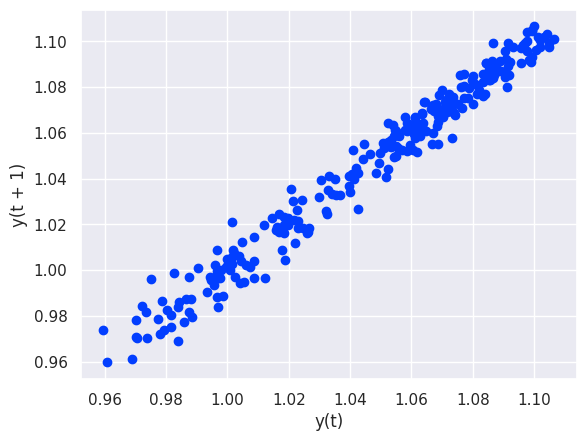

In [ ]:
fig, ax = plt.subplots()
lag_plot(df['Close'], ax=ax, lag=1)
plt.show()

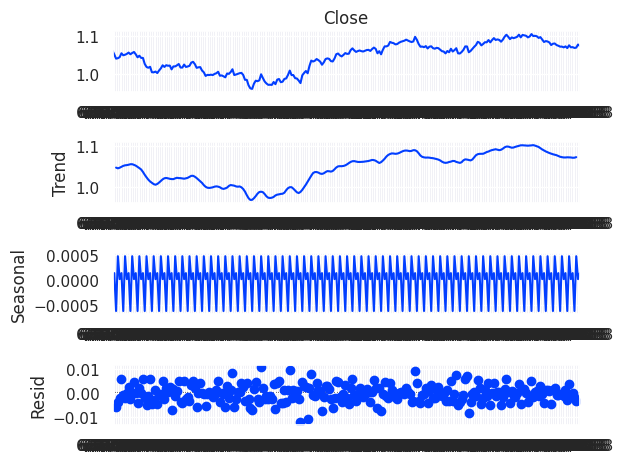

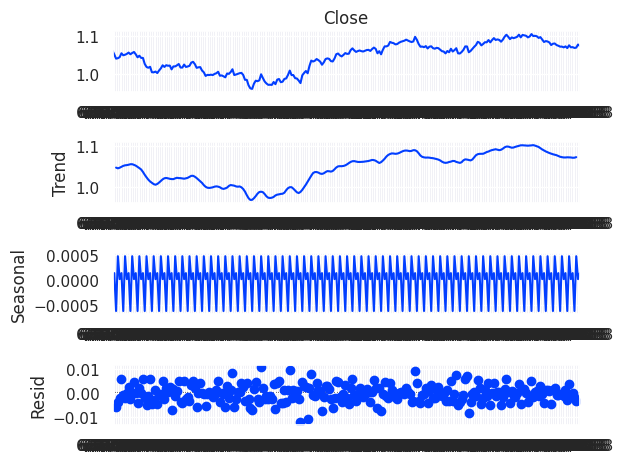

In [ ]:
seasonal_decompose(df['Close'],period=4).plot()

In [ ]:
adf_result = adfuller(df['Close'])
print(f'ADF test statistic: {adf_result[0]:.2f}')
print(f'p-value: {adf_result[1]:.2f}')

lb_result = acorr_ljungbox(df['Close'], lags=[10], boxpierce=False)
lb_result_values = lb_result.values
lb_statistic = lb_result_values[0, 0]
lb_pvalue = lb_result_values[0, 1]
print(f'Ljung-Box test statistic: {lb_statistic:.2f}')
print(f'p-value: {lb_pvalue:.2f}')

ADF test statistic: -1.23
p-value: 0.66
Ljung-Box test statistic: 2348.08
p-value: 0.00


In [ ]:
kpss_result = kpss(df['Close'])
print(f'KPSS test statistic: {kpss_result[0]:.2f}')
print(f'p-value: {kpss_result[1]:.2f}')

# Interpret the results
if kpss_result[1] < 0.05:
    print('Reject null hypothesis, time series is not stationary')
else:
    print('Fail to reject null hypothesis, time series is stationary')

KPSS test statistic: 1.64
p-value: 0.01
Reject null hypothesis, time series is not stationary


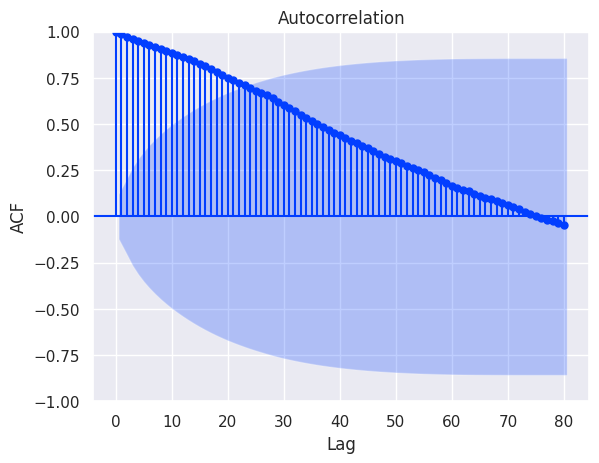

In [ ]:
plot_acf(df['Close'], lags=80, zero=True)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

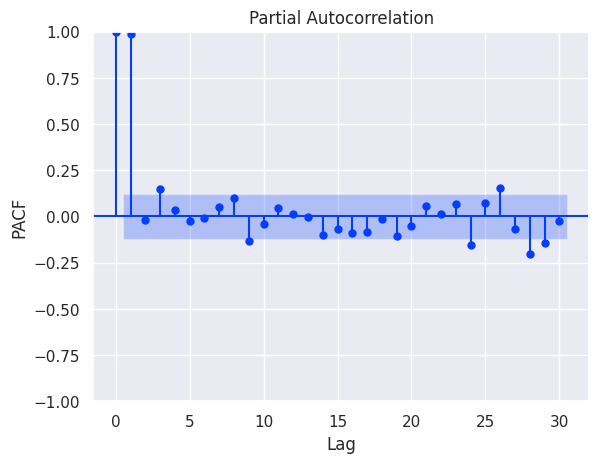

In [ ]:
plot_pacf(df['Close'], lags=30)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

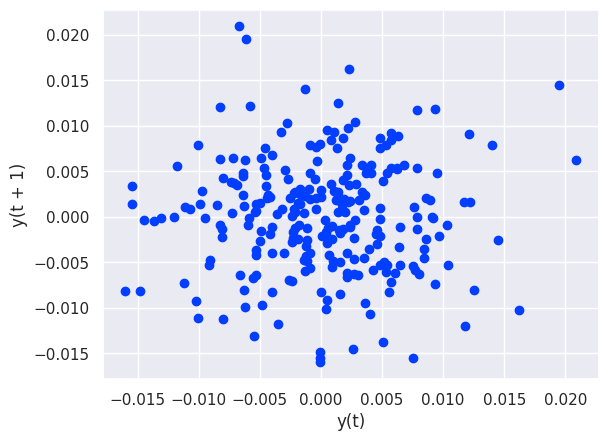

In [ ]:
df_stationary = df['Close'].diff(periods=1).dropna()
lag_plot(df_stationary)

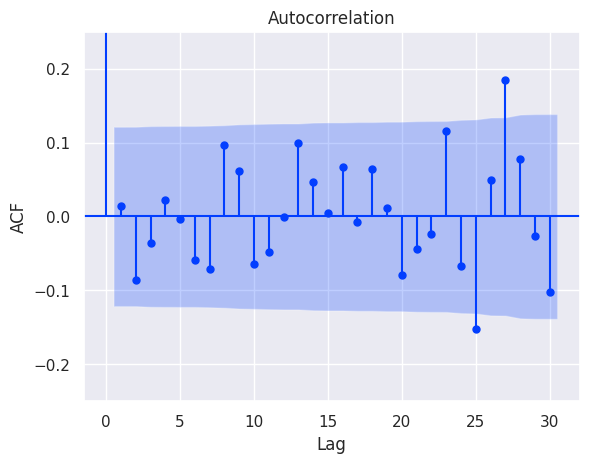

In [ ]:
plot_acf(df_stationary, lags=30, adjusted=True)
plt.ylim([-0.25,0.25])
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

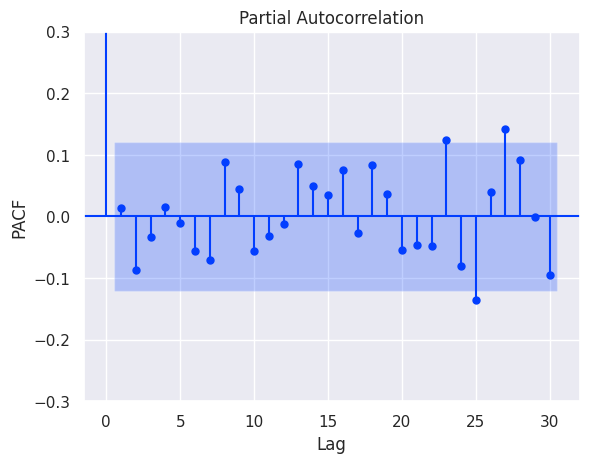

In [ ]:
plot_pacf(df_stationary, lags=30)
plt.ylim([-0.3,0.3])
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

In [ ]:
adf_result = adfuller(df_stationary)
print(adf_result)
print(f'ADF test statistic: {adf_result[0]:.2f}')
print(f'p-value: {adf_result[1]:.2f}')

# Perform Ljung-Box test for randomness
lb_result = acorr_ljungbox(df_stationary, lags=[10], boxpierce=False)
lb_result_values = lb_result.values
lb_statistic = lb_result_values[0, 0]
lb_pvalue = lb_result_values[0, 1]
print(f'Ljung-Box test statistic: {lb_statistic:.2f}')
print(f'p-value: {lb_pvalue:.2f}')

(-15.915191025101478, 8.039461367964277e-29, 0, 260, {'1%': -3.4557539868570775, '5%': -2.8727214497041422, '10%': -2.572728476331361}, -1780.0101364196973)
ADF test statistic: -15.92
p-value: 0.00
Ljung-Box test statistic: 9.04
p-value: 0.53


In [ ]:
train=df['Close'].iloc[:210]
test=df['Close'].iloc[210:]

In [ ]:
auto_arima(train,trace=True,start_p=1, start_q=1,max_p=6,max_q=6, d=None,seasonal=False,stepwise=True,suppress_warnings= True).summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1498.515, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1502.175, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1500.584, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1500.598, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1504.120, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.905 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  210
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 753.060
Date:                Wed, 28 Jun 2023   AIC                          -1504.120
Time:                        10:14:19   BIC                          -1500.777
Sample:                    06-09-2022   HQIC                         -1502.768
                         - 03-29-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.344e-05   3.98e-06     10.915      0.000    3.56e-05    5.12e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 0.73
Prob(Q):                              0.52   Prob(JB):                         0.69
Heteroskedasticity (H):               0.85   Skew:                             0.04
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

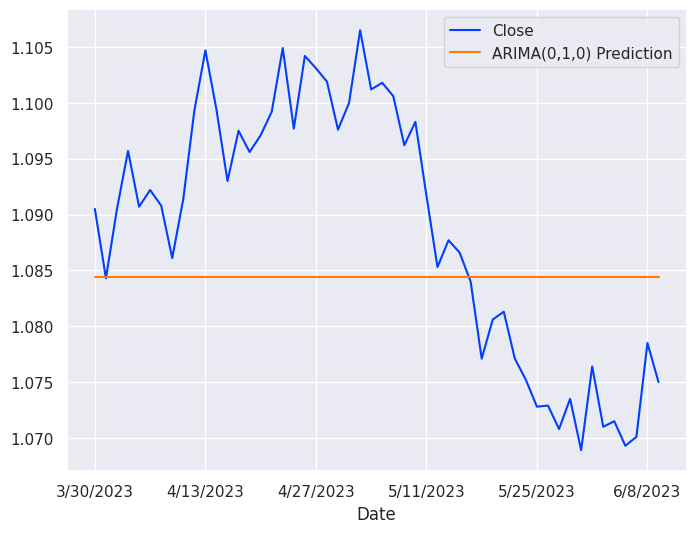

In [ ]:
start=len(train)
end=start+len(test)-1
model=ARIMA(train,order=(0,1,0)).fit()
predict=model.predict(start,end, index=test.index).rename('ARIMA(0,1,0) Prediction')
ax=test.plot(figsize=(8,6),legend=True)
predict.plot(legend=True);

In [ ]:
mean_squared_error(test,predict) * 100

0.014997480769230747

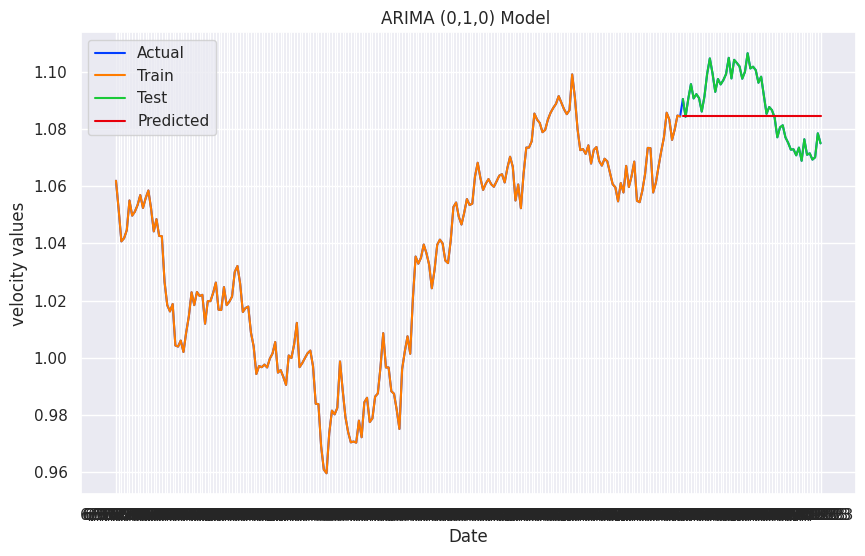

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Close'].index, df['Close'], label='Actual')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict.index, predict, label='Predicted')
plt.xlabel('Date')
plt.ylabel('velocity values')
plt.legend()
plt.title('ARIMA (0,1,0) Model ')
plt.show()

In [ ]:
# Define the range of p, d, and q values
p = range(0, 8)
d = range(0, 2)
q = range(0, 8)
pdq = list(itertools.product(p, d, q))


# # Perform grid search to find the best parameters
best_mse = np.inf
best_pdq = None
for param in pdq:
  try:
      mod = ARIMA(df['Close'], order=param)
      results = mod.fit()
      predict=results.predict(start=df['Close'].index[0],end=df['Close'].index[-1], index=df['Close'].index)
      mse = mean_squared_error(df['Close'], predict)
      if mse < best_mse:
          best_mse = mse
          best_pdq = param
  except:
      continue

# Print the best parameters
print('Best ARIMA{} model - MSE:{}'.format(best_pdq, best_mse))


Best ARIMA(6, 0, 7) model - MSE:3.696645928125694e-05


In [ ]:
# Define the range of p, d, and q values
p = range(0, 8)
d = range(0, 2)
q = range(0, 8)
pdq = list(itertools.product(p, d, q))

# Perform grid search to find the best parameters
mse_list = []
for param in pdq:
    try:
        mod = ARIMA(df['Close'], order=param)
        results = mod.fit()
        predict = results.predict(start=df['Close'].index[0], end=df['Close'].index[-1], index=df['Close'].index)
        mse = mean_squared_error(df['Close'], predict)
        mse_list.append((param, mse))
    except:
        continue

# Sort the list by MSE values and return the top five tuples
mse_list.sort(key=lambda x: x[1])
top_five = mse_list[:10]

# Print the top five parameter combinations and MSE values
for i, (param, mse) in enumerate(top_five):
    print('{}. ARIMA{} model - MSE:{}'.format(i+1, param, mse))

1. ARIMA(6, 0, 7) model - MSE:3.696645928125694e-05
2. ARIMA(7, 0, 7) model - MSE:3.721929689186104e-05
3. ARIMA(3, 0, 6) model - MSE:3.7362602529765263e-05
4. ARIMA(4, 0, 5) model - MSE:3.7523384129423514e-05
5. ARIMA(6, 0, 4) model - MSE:3.766592642483135e-05
6. ARIMA(3, 0, 7) model - MSE:3.766715841702816e-05
7. ARIMA(5, 0, 7) model - MSE:3.766859449373113e-05
8. ARIMA(3, 0, 5) model - MSE:3.7876094302137626e-05
9. ARIMA(6, 0, 5) model - MSE:3.7945222311823955e-05
10. ARIMA(5, 0, 5) model - MSE:3.7990787369020786e-05


In [ ]:
train=df['Close'].iloc[:210]
test=df['Close'].iloc[210:]
start=len(train)
end=start+len(test)-1
model=ARIMA(train,order=(6,0,7)).fit()
predict=model.predict(start,end,index=test.index).rename('ARIMA(6,0,7) Prediction')
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  210
Model:                 ARIMA(6, 0, 7)   Log Likelihood                 758.634
Date:                Wed, 28 Jun 2023   AIC                          -1487.268
Time:                        10:22:03   BIC                          -1437.061
Sample:                    06-09-2022   HQIC                         -1466.971
                         - 03-29-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0523      0.066     15.862      0.000       0.922       1.182
ar.L1          0.5940      0.809      0.734      0.463      -0.991       2.179
ar.L2         -0.3930      0.184     -2.140      0.032      -0.753      -0.033
ar.L3          0.4787      0.304      1.574      0.116      -0.118       1.075
ar.L4         -0.2704      0.308     -0.878      0.380      -0.874       0.333
ar.L5          0.9891      0.188      5.265      0.000       0.621       1.357
ar.L6         -0.4184      0.772     -0.542      0.588      -1.931       1.095
ma.L1          0.4425      0.810      0.546      0.585      -1.146       2.031
ma.L2          0.7390      0.741      0.998      0.318      -0.713       2.191
ma.L3          0.2845      0.890      0.320      0.749      -1.460       2.029
ma.L4          0.4964      0.685      0.725      0.468      -0.845       1.838
ma.L5         -0.4923      0.746     -0.660      0.509      -1.954       0.970
ma.L6         -0.1370      0.087     -1.581      0.114      -0.307       0.033
ma.L7         -0.0545      0.120     -0.454      0.650      -0.290       0.181
sigma2      4.117e-05   6.18e-06      6.667      0.000    2.91e-05    5.33e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.73
Prob(Q):                              1.00   Prob(JB):                         0.69
Heteroskedasticity (H):               0.83   Skew:                             0.02
Prob(H) (two-sided):                  0.44   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

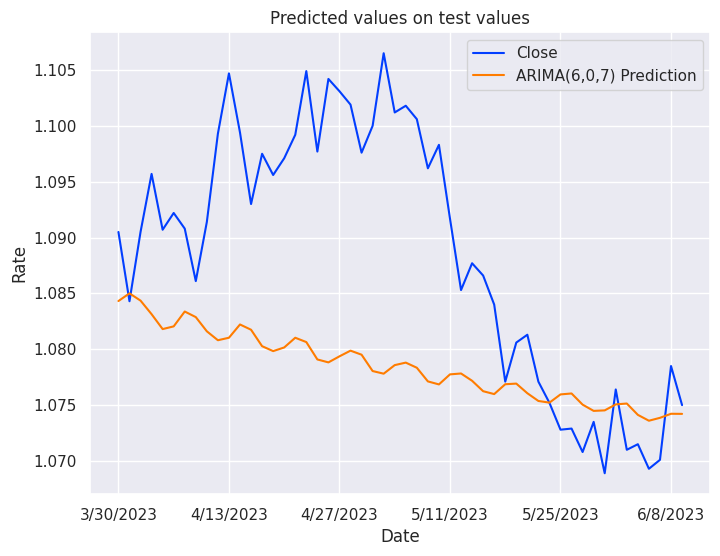

In [ ]:
ax=test.plot(figsize=(8,6),legend=True)
predict.plot(legend=True)
plt.ylabel('Rate')
plt.xlabel('Date')
plt.title('Predicted values on test values')
plt.show()

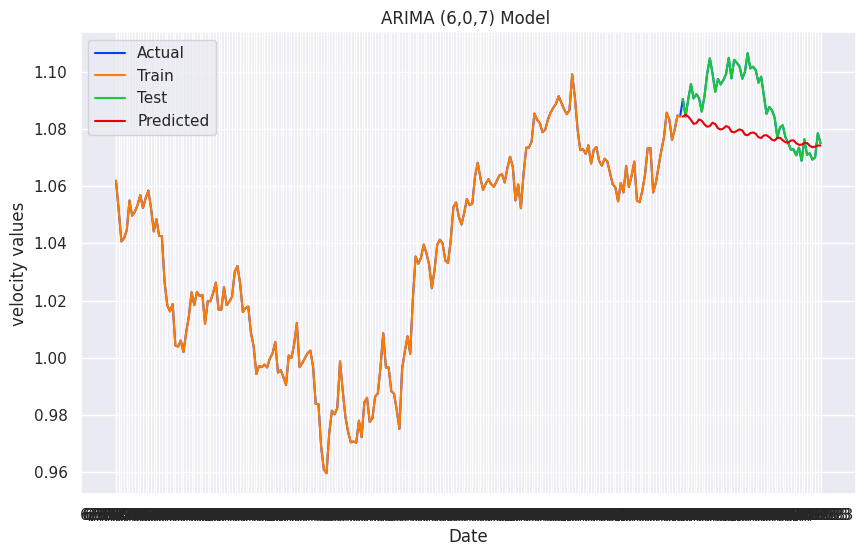

In [ ]:
# Plot the actual, train, test, and predicted values
plt.figure(figsize=(10, 6))
plt.plot(df['Close'].index, df['Close'], label='Actual')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict.index, predict, label='Predicted')
plt.xlabel('Date')
plt.ylabel('velocity values')
plt.legend()
plt.title('ARIMA (6,0,7) Model ')
plt.show()

In [ ]:
mean_squared_error(test, predict) *100

0.02001314888954539

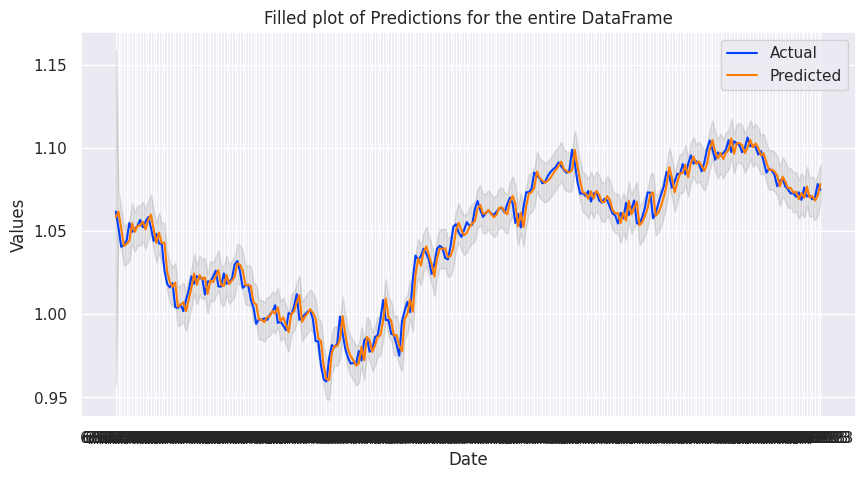

In [ ]:
# Generate predictions for the entire range of df_stationary
model=ARIMA(df['Close'],order=(6,0,7)).fit()
predictions = model.get_prediction(start=df['Close'].index[0], end=df['Close'].index[-1])
# Plot the actual and predicted values
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['Close'].index, df['Close'], label='Actual')
ax.plot(df['Close'].index, predictions.predicted_mean, label='Predicted')
ax.fill_between(df['Close'].index, predictions.conf_int()['lower Close'], predictions.conf_int()['upper Close'], color='k', alpha=0.1)
ax.legend()
plt.ylabel('Values')
plt.xlabel('Date')
plt.title('Filled plot of Predictions for the entire DataFrame')
plt.show()

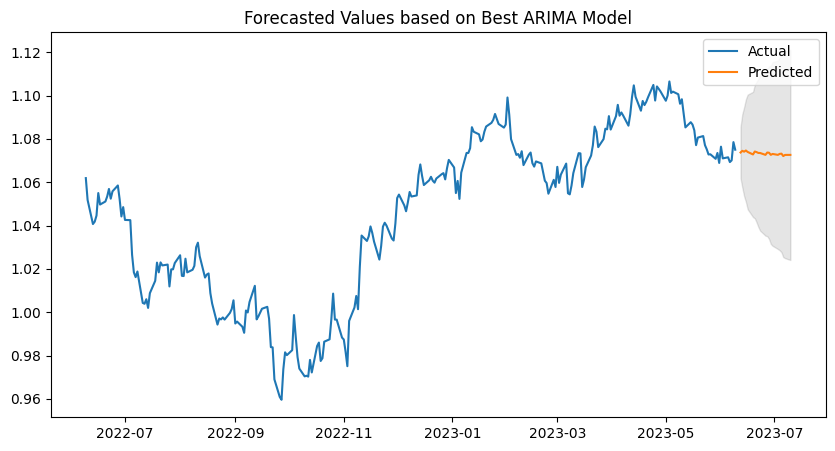

In [ ]:
# Generate predictions for the entire range of df_stationary
model=ARIMA(df['Close'],order=(6,0,7)).fit()
predictions = model.get_prediction(start=len(df['Close']), end=(len(df['Close'])+20))
# Plot the actual and predicted values
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['Close'].index, df['Close'], label='Actual')
ax.plot(predictions.conf_int().index, predictions.predicted_mean, label='Predicted')
ax.fill_between(predictions.conf_int().index, predictions.conf_int()['lower Close'], predictions.conf_int()['upper Close'], color='k', alpha=0.1)
ax.legend()
plt.title('Forecasted Values based on Best ARIMA Model')
plt.show()

In [ ]:
predictions.predicted_mean

2023-06-12    1.073718
2023-06-13    1.074490
2023-06-14    1.074100
2023-06-15    1.074628
2023-06-16    1.073971
2023-06-19    1.072819
2023-06-20    1.074167
2023-06-21    1.073905
2023-06-22    1.073508
2023-06-23    1.073484
2023-06-26    1.072626
2023-06-27    1.073690
2023-06-28    1.073618
2023-06-29    1.072638
2023-06-30    1.073044
2023-07-03    1.072626
2023-07-04    1.073074
2023-07-05    1.073187
2023-07-06    1.072072
2023-07-07    1.072599
2023-07-10    1.072615
Freq: B, Name: predicted_mean, dtype: float64

In [ ]:
predictions.conf_int()

,lower Close,upper Close
2023-06-12,1.061833,1.085603
2023-06-13,1.057501,1.091480
2023-06-14,1.053570,1.094629
2023-06-15,1.050962,1.098294
2023-06-16,1.047513,1.100429
2023-06-19,1.043918,1.101720
2023-06-20,1.043360,1.104974
2023-06-21,1.041509,1.106302
2023-06-22,1.039355,1.107662
2023-06-23,1.037645,1.109322


In [ ]:
auto_arima(train,trace=True,start_p=1, start_q=1,max_p=6,max_q=6, d=None,seasonal=True,stepwise=True,suppress_warnings= True).summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1498.515, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1502.175, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1500.584, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1500.598, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1504.120, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.870 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  210
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 753.060
Date:                Tue, 27 Jun 2023   AIC                          -1504.120
Time:                        03:43:17   BIC                          -1500.777
Sample:                    06-09-2022   HQIC                         -1502.768
                         - 03-29-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.344e-05   3.98e-06     10.915      0.000    3.56e-05    5.12e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 0.73
Prob(Q):                              0.52   Prob(JB):                         0.69
Heteroskedasticity (H):               0.85   Skew:                             0.04
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))


seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]


best_mse = np.inf
best_pdq = None
best_seasonal_pdq = None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['Close'], order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            predict=results.predict(start=df['Close'].index[0],end=df['Close'].index[-1], index=df['Close'].index)
            mse = mean_squared_error(df['Close'], predict)

            if mse < best_mse:
                best_mse = mse
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue


print('Best SARIMA{}x{}12 model - MSE:{}'.format(best_pdq, best_seasonal_pdq, best_mse))

Best SARIMA(0, 1, 3)x(1, 0, 3, 12)12 model - MSE:0.0043420095433510525


In [ ]:
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)
q = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

mse_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
          mod = sm.tsa.statespace.SARIMAX(df['Close'], order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
          results = mod.fit()
          predict=results.predict(start=df['Close'].index[0],end=df['Close'].index[-1], index=df['Close'].index)
          mse = mean_squared_error(df['Close'], predict)
          mse_list.append((param, param_seasonal, mse))
        except:
            continue

mse_list.sort(key=lambda x: x[2])
top_five = mse_list[:5]

for i, (param, param_seasonal, mse) in enumerate(top_five):
    print('{}. SARIMA{}x{}12 model - MSE:{}'.format(i+1, param, param_seasonal, mse))

In [ ]:
model = ARIMA(train, order=(0,1,3)).fit()
pred = model.predict(start=len(train), end = (len(df['Close'])-1))
error = np.sqrt(mean_squared_error(test,pred))
error

0.012436741911650426

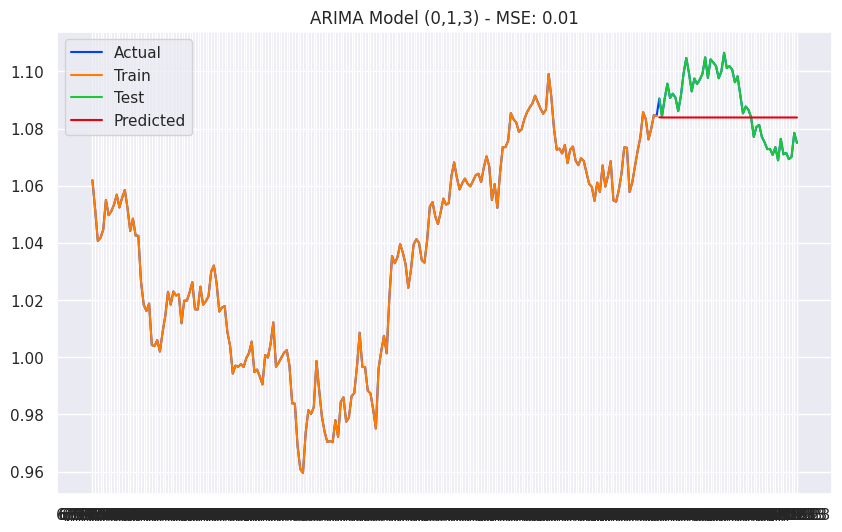

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Close'].index, df['Close'], label='Actual')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, pred, label='Predicted')
plt.legend()
plt.title(f'ARIMA Model (0,1,3) - MSE: {error:.2f}')
plt.show()

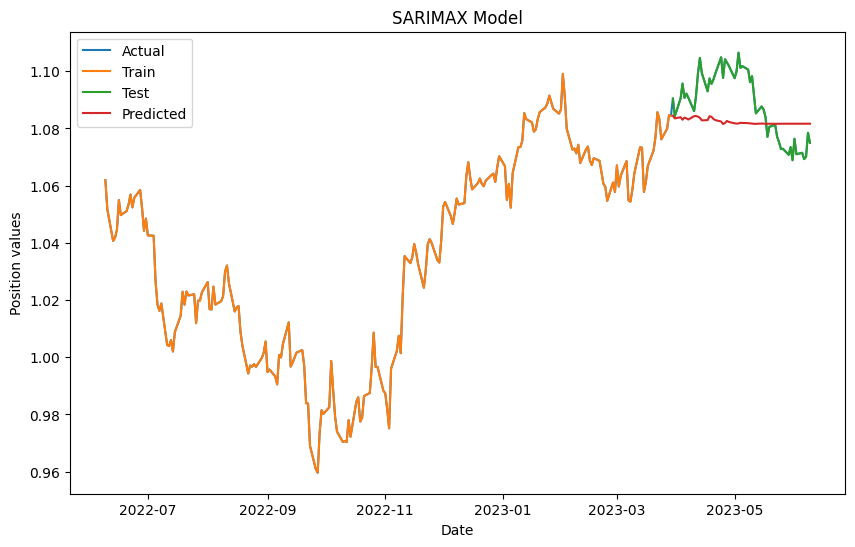

In [ ]:
# Fit the SARIMAX model with improved parameters
model = SARIMAX(train, order=(0, 1, 3), seasonal_order=(1, 0, 3, 12))
results = model.fit()


predictions = results.get_prediction(start=len(train), end=(len(df['Close'])-1)).summary_frame()


plt.figure(figsize=(10, 6))
plt.plot(df['Close'].index, df['Close'], label='Actual')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predictions.index, predictions['mean'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Position values')
plt.legend()
plt.title('SARIMAX Model')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test, predictions['mean']))
print(f"The root mean squared error is: {rmse:.4f}")

The root mean squared error is: 0.0128


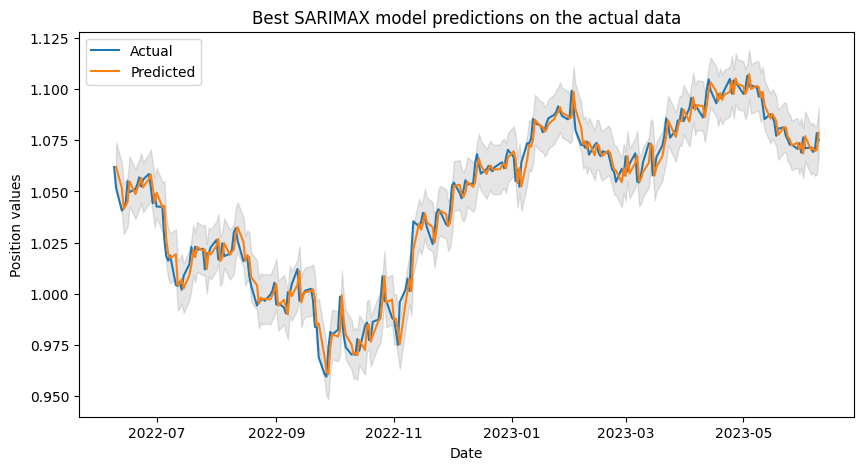

In [ ]:
# Generate predictions for the entire range of df_stationary
model = SARIMAX(df['Close'], order=(0, 1, 3), seasonal_order=(1, 0, 3, 12))
predictions = model.fit().get_prediction(start=df['Close'].index[0], end=df['Close'].index[-1])
# Plot the actual and predicted values
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['Close'].index, df['Close'], label='Actual')
ax.plot(predictions.conf_int().index[1:], predictions.predicted_mean[1:], label='Predicted')
ax.fill_between(predictions.conf_int().index[1:], predictions.conf_int()['lower Close'][1:], predictions.conf_int()['upper Close'][1:], color='k', alpha=0.1)
ax.legend()
plt.xlabel('Date')
plt.ylabel('Position values')
plt.title('Best SARIMAX model predictions on the actual data')
plt.show()

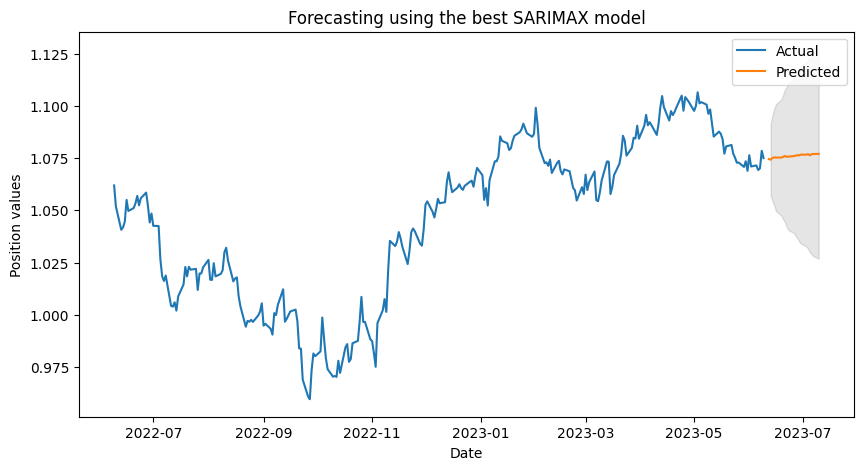

In [ ]:
# Generate predictions for the entire range of df_stationary
model = SARIMAX(df['Close'], order=(0, 1, 3), seasonal_order=(1, 0, 3, 12))
results = model.fit()

# Make predictions
predictions = results.get_prediction(start=len(df['Close']), end=(len(df['Close']) + 20))
# Plot the actual and predicted values
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['Close'].index, df['Close'], label='Actual')
ax.plot(predictions.conf_int().index, predictions.predicted_mean, label='Predicted')
ax.fill_between(predictions.conf_int().index[1:], predictions.conf_int()['lower Close'][1:], predictions.conf_int()['upper Close'][1:], color='k', alpha=0.1)
ax.legend()
plt.xlabel('Date')
plt.ylabel('Position values')
plt.title('Forecasting using the best SARIMAX model')
plt.show()

In [ ]:
predictions.predicted_mean

2023-06-12    1.074541
2023-06-13    1.074248
2023-06-14    1.075031
2023-06-15    1.075380
2023-06-16    1.075248
2023-06-19    1.075274
2023-06-20    1.075555
2023-06-21    1.076033
2023-06-22    1.075618
2023-06-23    1.075715
2023-06-26    1.075967
2023-06-27    1.076117
2023-06-28    1.076423
2023-06-29    1.076318
2023-06-30    1.076682
2023-07-03    1.076636
2023-07-04    1.076915
2023-07-05    1.076346
2023-07-06    1.076819
2023-07-07    1.076966
2023-07-10    1.077026
Freq: B, Name: predicted_mean, dtype: float64

In [ ]:
predictions.conf_int()

,lower Close,upper Close
2023-06-12,1.062419,1.086664
2023-06-13,1.057026,1.091469
2023-06-14,1.054498,1.095565
2023-06-15,1.052184,1.098577
2023-06-16,1.049664,1.100832
2023-06-19,1.047506,1.103041
2023-06-20,1.045764,1.105346
2023-06-21,1.044347,1.107718
2023-06-22,1.042145,1.109091
2023-06-23,1.040545,1.110885


# LSTM Model

In [ ]:
# Prepare the dataset for LSTM
df_lstm = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
df_lstm = scaler.fit_transform(df_lstm)

# Splitting the dataset into train and test set
train_size = int(len(df_lstm) * 0.8)
test_size = len(df_lstm) - train_size
train, test = df_lstm[0:train_size,:], df_lstm[train_size:len(df_lstm),:]

# Converting an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Creating and fitting the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Predicting the future
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverting predictions to original scale for interpretation
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculating root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.4f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.4f RMSE' % (testScore))

Epoch 1/100
207/207 - 6s - loss: 0.2384 - 6s/epoch - 27ms/step
Epoch 2/100
207/207 - 1s - loss: 0.0729 - 608ms/epoch - 3ms/step
Epoch 3/100
207/207 - 1s - loss: 0.0407 - 681ms/epoch - 3ms/step
Epoch 4/100
207/207 - 1s - loss: 0.0335 - 577ms/epoch - 3ms/step
Epoch 5/100
207/207 - 1s - loss: 0.0274 - 674ms/epoch - 3ms/step
Epoch 6/100
207/207 - 1s - loss: 0.0217 - 547ms/epoch - 3ms/step
Epoch 7/100
207/207 - 1s - loss: 0.0162 - 684ms/epoch - 3ms/step
Epoch 8/100
207/207 - 1s - loss: 0.0116 - 686ms/epoch - 3ms/step
Epoch 9/100
207/207 - 1s - loss: 0.0079 - 706ms/epoch - 3ms/step
Epoch 10/100
207/207 - 1s - loss: 0.0052 - 616ms/epoch - 3ms/step
Epoch 11/100
207/207 - 1s - loss: 0.0036 - 611ms/epoch - 3ms/step
Epoch 12/100
207/207 - 1s - loss: 0.0027 - 604ms/epoch - 3ms/step
Epoch 13/100
207/207 - 0s - loss: 0.0023 - 469ms/epoch - 2ms/step
Epoch 14/100
207/207 - 1s - loss: 0.0021 - 520ms/epoch - 3ms/step
Epoch 15/100
207/207 - 0s - loss: 0.0021 - 477ms/epoch - 2ms/step
Epoch 16/100
207/207 

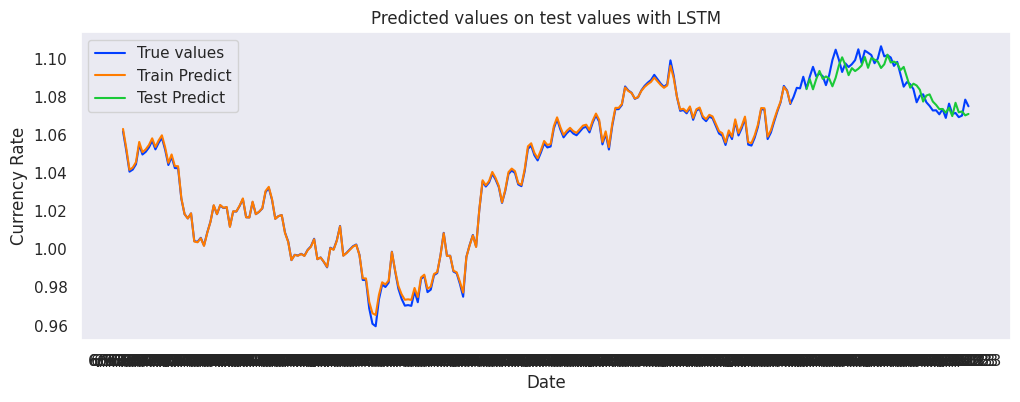

In [ ]:
# Plotting baseline and predictions
test_index = range(len(df_lstm) - test_size + 2, len(df_lstm))
sns.set_palette('bright')
plt.figure(figsize=(12,4))
plt.plot(df['Close'].index,scaler.inverse_transform(df_lstm), label='True values')
plt.plot(trainPredict, label='Train Predict')
plt.plot(df['Close'].index[test_index],testPredict, label='Test Predict')
plt.xticks(rotation=90)
plt.ylabel('Currency Rate')
plt.xlabel('Date')
plt.title('Predicted values on test values with LSTM')
plt.legend()
plt.grid(True)
plt.show()

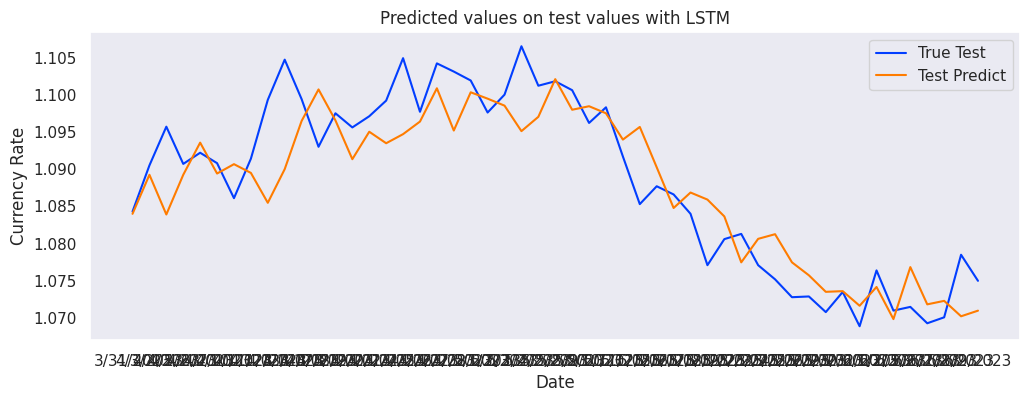

In [ ]:
test_index = range(len(df_lstm) - test_size + 2, len(df_lstm))
sns.set_palette('bright')
plt.figure(figsize=(12,4))
plt.plot(df['Close'].index[test_index],scaler.inverse_transform(df_lstm[test_index]), label='True Test')
plt.plot(df['Close'].index[test_index],testPredict, label='Test Predict')
plt.xticks(rotation=90)
plt.ylabel('Currency Rate')
plt.xlabel('Date')
plt.title('Predicted values on test values with LSTM')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from pandas import Timestamp
from pandas.tseries.offsets import BDay
# Prepare input data for prediction
last_20_days = df_lstm[-1:]  # Last 20 days of available data
predicted_values = []

# Get the last index from df['Close']
last_index = df['Close'].index[-1]

# Generate predictions for the next 20 days
for i in range(20):
    prediction = model.predict(last_20_days.reshape(1, 1, 1))  # Reshape input for prediction
    predicted_values.append(prediction[0, 0])  # Store the predicted value
    last_20_days = np.append(last_20_days[1:], prediction)  # Update input for the next iteration

    # Generate the next index based on the last index
    next_index = Timestamp(last_index) + pd.DateOffset(days=i+1)
    df['Close'] = df['Close'].append(pd.Series([prediction[0, 0]], index=[next_index]))


predicted_values = scaler.inverse_transform([predicted_values])

next_index = pd.date_range(start=last_index , periods=21, freq=BDay())
extended_index = df['Close'].index.append(next_index)
predicted_values_with_index = pd.Series(predicted_values[0], index=extended_index[-20:])

1/1 [==============================] - 0s 47ms/step


In [ ]:
predicted_values_with_index

2023-06-12    1.075558
2023-06-13    1.076071
2023-06-14    1.076541
2023-06-15    1.076971
2023-06-16    1.077363
2023-06-19    1.077719
2023-06-20    1.078043
2023-06-21    1.078337
2023-06-22    1.078603
2023-06-23    1.078843
2023-06-26    1.079060
2023-06-27    1.079255
2023-06-28    1.079432
2023-06-29    1.079590
2023-06-30    1.079732
2023-07-03    1.079860
2023-07-04    1.079975
2023-07-05    1.080078
2023-07-06    1.080170
2023-07-07    1.080253
dtype: float64

# The Gradient Boosting model

Train Score: 0.0043 RMSE
Test Score: 0.0080 RMSE


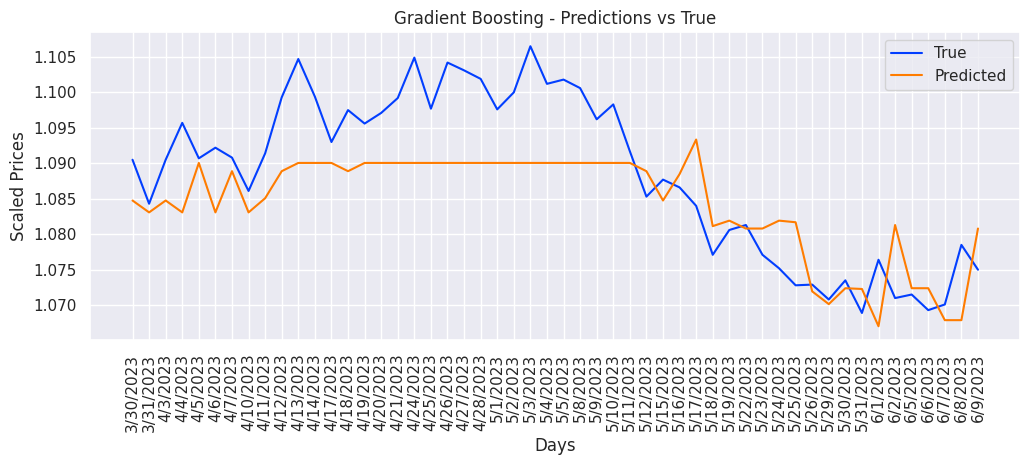

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Extract the 'Close' prices
df_close = pd.DataFrame(df['Close'])

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_close)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

# Prepare the train and test datasets
X_train, y_train = train[:-1], train[1:]
X_test, y_test = test[:-1], test[1:]

# Create the Gradient Boosting model
model = GradientBoostingRegressor()

# Fit the model to the training data
model.fit(X_train, y_train.ravel())

# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Invert predictions
train_pred = scaler.inverse_transform(train_pred.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train)
test_pred = scaler.inverse_transform(test_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test)

# Calculate root mean squared error
train_score = np.sqrt(mean_squared_error(y_train, train_pred))
print('Train Score: %.4f RMSE' % (train_score))
test_score = np.sqrt(mean_squared_error(y_test, test_pred))
print('Test Score: %.4f RMSE' % (test_score))

# Plot the predictions
plt.figure(figsize=(12, 4))
plt.plot(df['Close'].index[-52:],y_test, label='True')
plt.plot(df['Close'].index[-52:],test_pred, label='Predicted')
plt.xticks(rotation=90)
plt.xlabel('Days')
plt.ylabel('Scaled Prices')
plt.title('Gradient Boosting - Predictions vs True')
plt.legend()
plt.show()

In [ ]:
# Extend the input data by appending the last 20 days from the test set
extended_data = np.append(scaled_data, test[-20:, :], axis=0)

# Prepare the input for prediction
X_pred = extended_data[-21:-1]  # Use the last 20 days as input

# Make predictions for the next 20 days
predictions = model.predict(X_pred)

# Invert predictions to the original scale

predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
next_index = pd.date_range(start=df['Close'].index[-1] , periods=21, freq=BDay())
extended_index = df['Close'].index.append(next_index)
predicted_values_with_index = pd.Series(predictions.flatten(), index=extended_index[-20:])

print(predicted_values_with_index)

2023-06-12    1.070930
2023-06-13    1.088479
2023-06-14    1.093349
2023-06-15    1.081141
2023-06-16    1.081917
2023-06-19    1.080804
2023-06-20    1.080804
2023-06-21    1.081917
2023-06-22    1.081688
2023-06-23    1.071943
2023-06-26    1.070147
2023-06-27    1.072389
2023-06-28    1.072283
2023-06-29    1.067028
2023-06-30    1.081301
2023-07-03    1.072389
2023-07-04    1.072389
2023-07-05    1.067887
2023-07-06    1.067887
2023-07-07    1.080804
dtype: float64


# XGBoost Model

Train Score: 0.0047 RMSE
Test Score: 0.0090 RMSE


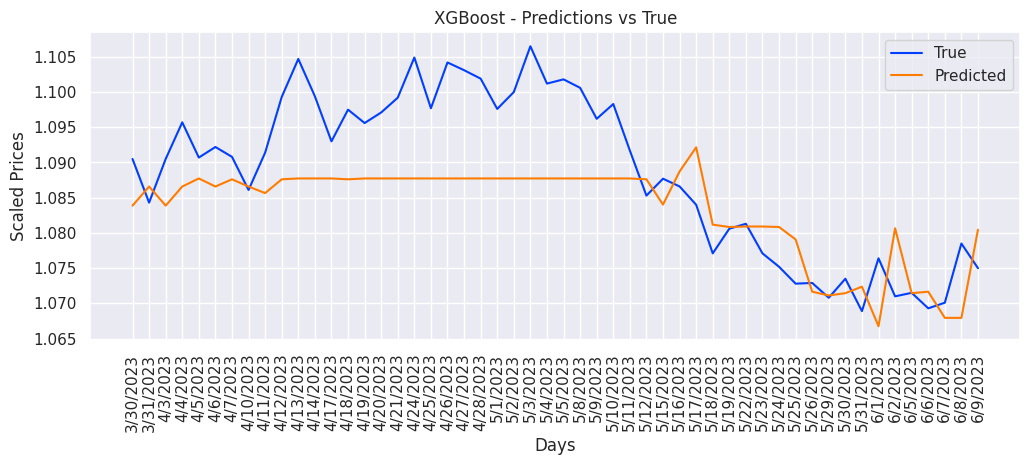

In [ ]:
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

# Extract the 'Close' prices and scale the data
df_close = df['Close'].values
scaler = MinMaxScaler(feature_range=(0, 1))
df_close = scaler.fit_transform(df_close.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(df_close) * 0.8)
train, test = df_close[0:train_size, :], df_close[train_size:len(df_close), :]

# Prepare the train and test datasets
X_train, y_train = train[:-1], train[1:]
X_test, y_test = test[:-1], test[1:]

# Create the XGBoost model
model = xgb.XGBRegressor()

# Define the parameters for the grid search
param_grid = {"n_estimators": [50, 100, 200],
              "learning_rate": [0.01, 0.05, 0.1],
              "max_depth": [3, 5, 7],
              "colsample_bytree": [0.8, 1],
              "subsample": [0.8, 1]}

# Perform the grid search
tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=model, cv=tscv,
                       param_grid=param_grid,
                       scoring='neg_mean_squared_error')
gsearch.fit(X_train, y_train.ravel())

# Use the best model
model = gsearch.best_estimator_

# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Invert predictions
train_pred = scaler.inverse_transform(train_pred.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train)
test_pred = scaler.inverse_transform(test_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test)

# Calculate root mean squared error
train_score = np.sqrt(mean_squared_error(y_train, train_pred))
print('Train Score: %.4f RMSE' % (train_score))
test_score = np.sqrt(mean_squared_error(y_test, test_pred))
print('Test Score: %.4f RMSE' % (test_score))

# Plot the predictions
plt.figure(figsize=(12, 4))
plt.plot(df['Close'].index[-52:],y_test, label='True')
plt.plot(df['Close'].index[-52:],test_pred, label='Predicted')
plt.xticks(rotation=90)
plt.xlabel('Days')
plt.ylabel('Scaled Prices')
plt.title('XGBoost - Predictions vs True')
plt.legend()
plt.show()


In [ ]:
extended_data = np.append(df_close, test[-20:, :], axis=0)


X_pred = extended_data[-21:-1]


predictions = model.predict(X_pred)



predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
next_index = pd.date_range(start=df['Close'].index[-1] , periods=21, freq=BDay())
extended_index = df['Close'].index.append(next_index)
predicted_values_with_index = pd.Series(predictions.flatten(), index=extended_index[-20:])

print(predicted_values_with_index)

2023-06-12    1.079081
2023-06-13    1.088723
2023-06-14    1.092154
2023-06-15    1.081178
2023-06-16    1.080843
2023-06-19    1.080914
2023-06-20    1.080914
2023-06-21    1.080843
2023-06-22    1.079081
2023-06-23    1.071660
2023-06-26    1.071127
2023-06-27    1.071449
2023-06-28    1.072374
2023-06-29    1.066755
2023-06-30    1.080662
2023-07-03    1.071449
2023-07-04    1.071660
2023-07-05    1.067946
2023-07-06    1.067946
2023-07-07    1.080462
dtype: float32


# Random Forest Regressor Model

Train Score: 0.0050 RMSE
Test Score: 0.0090 RMSE


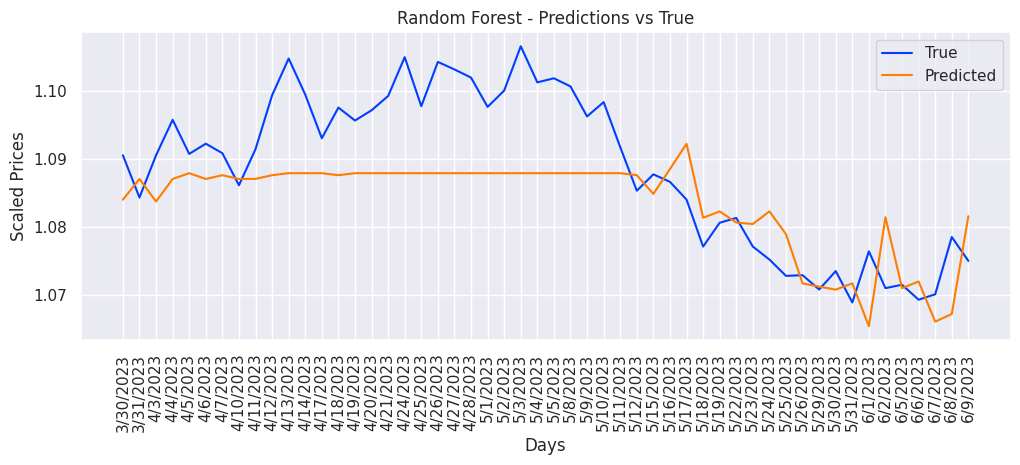

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV


df_close = df['Close'].values
scaler = MinMaxScaler(feature_range=(0, 1))
df_close = scaler.fit_transform(df_close.reshape(-1, 1))


train_size = int(len(df_close) * 0.8)
train, test = df_close[0:train_size, :], df_close[train_size:len(df_close), :]


X_train, y_train = train[:-1], train[1:]
X_test, y_test = test[:-1], test[1:]


model = RandomForestRegressor()


param_grid = {"n_estimators": [50, 100, 200],
              "max_depth": [3, 5, 7],
              "min_samples_split": [2, 3, 4]}


tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=model, cv=tscv,
                       param_grid=param_grid,
                       scoring='neg_mean_squared_error')
gsearch.fit(X_train, y_train.ravel())


model = gsearch.best_estimator_


train_pred = model.predict(X_train)
test_pred = model.predict(X_test)


train_pred = scaler.inverse_transform(train_pred.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train)
test_pred = scaler.inverse_transform(test_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test)


train_score = np.sqrt(mean_squared_error(y_train, train_pred))
print('Train Score: %.4f RMSE' % (train_score))
test_score = np.sqrt(mean_squared_error(y_test, test_pred))
print('Test Score: %.4f RMSE' % (test_score))


plt.figure(figsize=(12, 4))
plt.plot(df['Close'].index[-52:],y_test, label='True')
plt.plot(df['Close'].index[-52:],test_pred, label='Predicted')
plt.xticks(rotation=90)
plt.xlabel('Days')
plt.ylabel('Scaled Prices')
plt.title('Random Forest - Predictions vs True')
plt.legend()
plt.show()


In [ ]:
extended_data = np.append(df_close, test[-20:, :], axis=0)


X_pred = extended_data[-21:-1]


predictions = model.predict(X_pred)



predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
next_index = pd.date_range(start=df['Close'].index[-1] , periods=21, freq=BDay())
extended_index = df['Close'].index.append(next_index)
predicted_values_with_index = pd.Series(predictions.flatten(), index=extended_index[-20:])

print(predicted_values_with_index)

2023-06-12    1.074621
2023-06-13    1.088452
2023-06-14    1.094106
2023-06-15    1.081658
2023-06-16    1.083854
2023-06-19    1.079067
2023-06-20    1.079361
2023-06-21    1.083854
2023-06-22    1.080059
2023-06-23    1.072908
2023-06-26    1.070939
2023-06-27    1.073043
2023-06-28    1.073053
2023-06-29    1.064563
2023-06-30    1.081694
2023-07-03    1.073043
2023-07-04    1.074467
2023-07-05    1.065879
2023-07-06    1.067465
2023-07-07    1.081259
dtype: float64


# Gated Recurrent Units (GRU)

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam


scaler = MinMaxScaler(feature_range=(0, 1))
df_close = df['Close'].values
df_close = df_close.reshape(-1,1)
df_close = scaler.fit_transform(df_close)


train_size = int(len(df_close) * 0.8)
test_size = len(df_close) - train_size
train, test = df_close[0:train_size], df_close[train_size:len(df_close)]


def create_dataset(dataset, look_back=7):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

X_train, y_train = create_dataset(train)
X_test, y_test = create_dataset(test)


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(GRU(50))
model.add(Dense(1))


model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')


model.fit(X_train, y_train, epochs=50, batch_size=64)


predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)
real_price = scaler.inverse_transform(y_test.reshape(-1, 1))

Epoch 1/50
4/4 [==============================] - 8s 35ms/step - loss: 0.1313
Epoch 2/50
4/4 [==============================] - 0s 39ms/step - loss: 0.0622
Epoch 3/50
4/4 [==============================] - 0s 74ms/step - loss: 0.0221
Epoch 4/50
4/4 [==============================] - 0s 75ms/step - loss: 0.0111
Epoch 5/50
4/4 [==============================] - 0s 76ms/step - loss: 0.0082
Epoch 6/50
4/4 [==============================] - 0s 77ms/step - loss: 0.0094
Epoch 7/50
4/4 [==============================] - 0s 81ms/step - loss: 0.0062
Epoch 8/50
4/4 [==============================] - 0s 67ms/step - loss: 0.0045
Epoch 9/50
4/4 [==============================] - 0s 69ms/step - loss: 0.0047
Epoch 10/50
4/4 [==============================] - 0s 66ms/step - loss: 0.0042
Epoch 11/50
4/4 [==============================] - 0s 31ms/step - loss: 0.0032
Epoch 12/50
4/4 [==============================] - 0s 39ms/step - loss: 0.0029
Epoch 13/50
4/4 [==============================] - 0s 29ms/st

In [ ]:
mean_squared_error(real_price, predicted_price)

2.576075386516846e-05

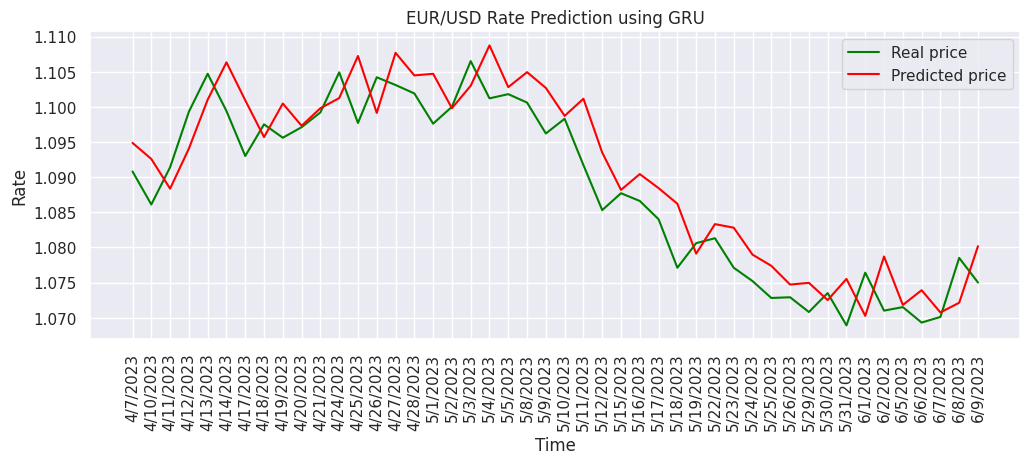

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df['Close'].index[-46:],real_price, color='green', label='Real price')
plt.plot(df['Close'].index[-46:],predicted_price, color='red', label='Predicted price')
plt.title('EUR/USD Rate Prediction using GRU')
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

In [ ]:
from pandas import Timestamp
from pandas.tseries.offsets import BDay

last_100_days = df_close[-100:]
predicted_values = []


last_index = df['Close'].index[-1]


for i in range(20):
    prediction = model.predict(last_100_days.reshape(1, 100, 1))
    predicted_values.append(prediction[0, 0])
    last_100_days = np.append(last_100_days[1:], prediction)


    next_index = Timestamp(last_index) + pd.DateOffset(days=i+1)
    df['Close'] = df['Close'].append(pd.Series([prediction[0, 0]], index=[next_index]))

predicted_values = scaler.inverse_transform([predicted_values])

next_index = pd.date_range(start=last_index , periods=21, freq=BDay())
extended_index = df['Close'].index.append(next_index)
predicted_values_with_index = pd.Series(predicted_values[0], index=extended_index[-20:])

1/1 [==============================] - 0s 139ms/step


In [ ]:
predicted_values_with_index

2023-06-12    1.075888
2023-06-13    1.078063
2023-06-14    1.079601
2023-06-15    1.081274
2023-06-16    1.082942
2023-06-19    1.084638
2023-06-20    1.086364
2023-06-21    1.088123
2023-06-22    1.089916
2023-06-23    1.091745
2023-06-26    1.093611
2023-06-27    1.095516
2023-06-28    1.097462
2023-06-29    1.099451
2023-06-30    1.101485
2023-07-03    1.103566
2023-07-04    1.105695
2023-07-05    1.107875
2023-07-06    1.110109
2023-07-07    1.112399
dtype: float64